In [29]:
# Source: https://www.kaggle.com/rashmiek99/pima-indians-diabetes-logistic-regression-from-sc
# Dataset source: https://www.kaggle.com/uciml/pima-indians-diabetes-database

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from random import randrange
import warnings
warnings.filterwarnings("ignore")

In [30]:
diabetes_df = pd.read_csv("pima-india-diabetes.csv")
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [31]:
print("How many null values in the dataset?:",diabetes_df.isnull().any().sum())

How many null values in the dataset?: 0


              6       148        72        35         0      33.6     0.627  \
6      1.000000  0.128846  0.141197 -0.082495 -0.072999  0.017518 -0.033927   
148    0.128846  1.000000  0.152498  0.056381  0.332383  0.220955  0.136903   
72     0.141197  0.152498  1.000000  0.207308  0.089098  0.281777  0.041180   
35    -0.082495  0.056381  0.207308  1.000000  0.437974  0.392553  0.183498   
0     -0.072999  0.332383  0.089098  0.437974  1.000000  0.198111  0.185579   
33.6   0.017518  0.220955  0.281777  0.392553  0.198111  1.000000  0.140546   
0.627 -0.033927  0.136903  0.041180  0.183498  0.185579  0.140546  1.000000   
50     0.544018  0.262408  0.239571 -0.115873 -0.040942  0.035911  0.032738   
1      0.221087  0.465856  0.064882  0.073265  0.131984  0.292695  0.173245   

             50         1  
6      0.544018  0.221087  
148    0.262408  0.465856  
72     0.239571  0.064882  
35    -0.115873  0.073265  
0     -0.040942  0.131984  
33.6   0.035911  0.292695  
0.627  0.0327

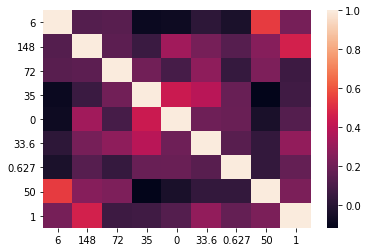

In [41]:
corr = diabetesDF.corr()
print(corr)
sns.heatmap(corr, 
         xticklabels=corr.columns, 
         yticklabels=corr.columns)

In [33]:
X = diabetes_df[:,0:8] #Predictors
y = diabetes_df[:,8] #Target

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

logistic_model = LogisticRegression(fit_intercept=True,C=1e15)
logistic_model.fit(X_train,y_train)
predicted = logistic_model.predict(X_test)

print("Confusion Matrix")
matrix = confusion_matrix(y_test,predicted)
print(matrix)

print("\nClassification Report")
report = classification_report(y_test,predicted)
print(report)

lr_accuracy = accuracy_score(y_test, predicted)
print('Logistic Regression Accuracy of Scikit Model: {:.2f}%'.format(lr_accuracy*100))

Confusion Matrix
[[122  21]
 [ 38  50]]

Classification Report
              precision    recall  f1-score   support

         0.0       0.76      0.85      0.81       143
         1.0       0.70      0.57      0.63        88

    accuracy                           0.74       231
   macro avg       0.73      0.71      0.72       231
weighted avg       0.74      0.74      0.74       231

Logistic Regression Accuracy of Scikit Model: 74.46%


### Creating our own Logistic Regression in Python (not using sklearn)

In [35]:
# Code to create Logistic Regression using Sigmoid Function from scratch
#find the mininum and maximum value of each column
def dataset_minmax(dataset):
    minmax = list()
    
    for i in range(len(dataset[0])):
        col_values = [row[i] for row in dataset]
        
        value_min = min(col_values)
        value_max = max(col_values)

        minmax.append([value_min, value_max])
    
    return minmax

#rescale the value of each column to be within 0 and 1
def normalize_dataset(dataset, minmax):
    for row in dataset:
        for i in range(len(row)):
            row[i]= (row[i]-minmax[i][0]) / (minmax[i][1]-minmax[i][0])

In [48]:
#Predicts an output value for a row given a set of coefficients.

def predict(row, coefficients):
    z = coefficients[0]
    for i in range(len(row)-1):
        z += coefficients[i + 1] * row[i]
    return 1.0 / (1.0 + np.exp(-z))

In [49]:
# Estimate logistic regression coefficients using stochastic gradient descent

def get_coefficients(train, l_rate, n_steps):
    coef = [0.0 for i in range(len(train[0]))]
    
    for step in range(n_steps): #steps times
        sum_error = 0

        for row in train: #all rows
            z = predict(row, coef)
            error = row[-1] - z #z - row[-1]
            coef[0] = coef[0] + l_rate * error * z * (1.0 - z) #b0
            
            for i in range(len(row)-1): #each coefficient (b1,b2,b3....)
                coef[i+1] = coef[i+1]+l_rate*error*z*(1.0-z)*row[i]
                
    return coef

In [51]:
def evaluate_model(test,coef):
    predictions = []
    for r in test:
        z = round(predict(r,coef))    
        predictions.append(z)
        
    return(predictions)

In [52]:
def logistic_regression(train,test,l_rate,n_steps):    
    
    #get the coefficients from the training set
    coef = get_coefficients(train,l_rate,n_steps)
    
    #use these to validate against the test set
    predictions = evaluate_model(test,coef)
    
    return(predictions)

In [53]:
# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual))

In [56]:
minmax =dataset_minmax(diabetes_df)
normalize_dataset(diabetes_df, minmax)

l_rate = 0.3
n_steps = 100
n_folds = 3

train_set, test_set = train_test_split(diabetes_df, test_size=0.3)

actual = test_set[:,8]
test_set = test_set[:,0:8]

predicted = logistic_regression(train_set, test_set,l_rate,n_steps)

print("Confusion Matrix")
matrix = confusion_matrix(actual,predicted)
print(matrix)

print("\nClassification Report")
report = classification_report(actual,predicted)
print(report)

scores = accuracy_metric(actual, predicted)
print('Logistic Regression Accuracy Of Our Model: {:.2f}%'.format(scores*100))

Confusion Matrix
[[131  12]
 [ 53  35]]

Classification Report
              precision    recall  f1-score   support

         0.0       0.71      0.92      0.80       143
         1.0       0.74      0.40      0.52        88

    accuracy                           0.72       231
   macro avg       0.73      0.66      0.66       231
weighted avg       0.72      0.72      0.69       231

Logistic Regression Accuracy Of Our Model: 71.86%
